In [1]:
# IMPORTING LIBRARIES 
import pandas as pd
import numpy as np 
import seaborn as sbn


In [2]:
#IMPORTING THE CSV FILE
sales = pd.read_csv("C:\\Users\\sehga\\OneDrive\\Documents\\PROJECTS\\diwalisales.csv",encoding= 'unicode_escape')


In [3]:
#CHECKING THE INFORMATION RELATED TO SALES DATA
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
sales.shape

(11251, 15)

In [5]:
sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
sales.drop(['Status','unnamed1'],axis=1,inplace=True)
#WE DROPPED THE TWO COLUMNS THAT CONTAINED ALL NULL VALUES

In [7]:
sales.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#SINCE AMOUNT COLUMN CONTAINS SOME NULL DATA, WE CAN REMOVE IT
sales.dropna(inplace=True)


In [9]:
sales.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
#NOW THE DATA DOES NOT CONTAIN ANY NULL VALUE,LETS CHECK FOR DUPLICATE VALUES
sales[sales.duplicated()]


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0


In [16]:
sales=sales.drop_duplicates(ignore_index=True)


In [18]:
sales.shape


(11231, 13)

In [19]:
#LET US NOW RENAME DIFFERENT COLUMNS
sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [103]:
sales=sales.rename(columns={'Cust_name':'Name','Product_ID':'Item_code','Product_Category':'Item_category'})

sales.columns

Index(['User_ID', 'Name', 'Item_code', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Item_category',
       'Orders', 'Amount'],
      dtype='object')

In [23]:
sales.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084982
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728776
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [25]:
#LETS FIND THE STATISTICAL DESCRIPTION ONLY FOR AGE,ORDERS AND AMOUNT
sales[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084982
std,12.756116,1.114880,5221.728776
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


In [26]:
#LET US PERFORM EXPLORATORY DATA ANALYSIS TO FIND SOME VALUABLE INSIGHTS

<Axes: xlabel='Gender', ylabel='count'>

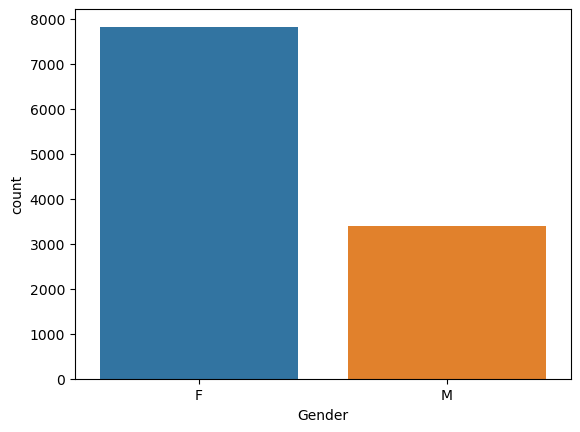

In [32]:
#PLOTTING A BAR CHART TO SEE WHICH GENDER IS MORE IN NUMBER
sbn.countplot(data=sales,x='Gender')


In [33]:
#MORE NUMBER OF FEMALES HAVE BOUGHT THE PRODUCTS THAN MEN

<Axes: xlabel='Age Group', ylabel='count'>

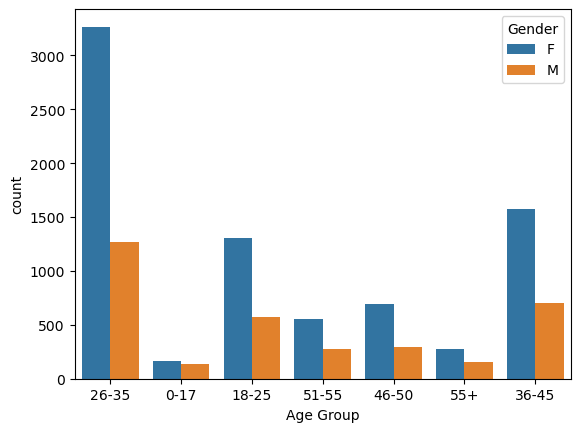

In [34]:
#LET US FIND THE NUMBER OF PEOPLEIN DIFFERENT AGE GROUP DEPENDING ON THEIR GENDER 
sbn.countplot(data=sales,x='Age Group',hue='Gender')

In [48]:
#WOMEN IN THE AGE GROUP OF 26-35 HAVE DONE MORE PURCHASES THAN MEN

<Axes: xlabel='Age Group', ylabel='Amount'>

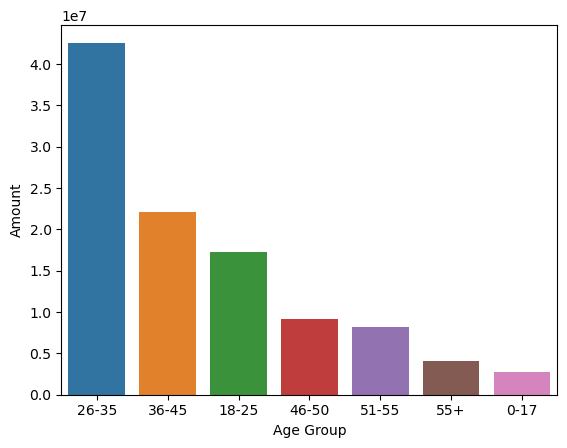

In [60]:
sales_age = sales.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sbn.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)




<Axes: xlabel='Gender', ylabel='Amount'>

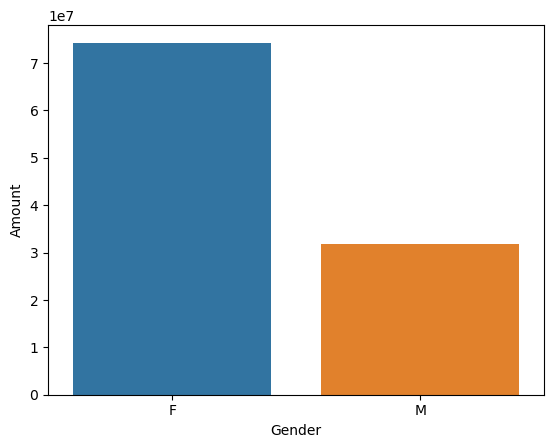

In [61]:
sales_age = sales.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sbn.barplot(x = 'Gender',y= 'Amount' ,data = sales_age)



In [62]:
#FEMALES IN THE AGE GROUP 26-35 CONTRIBUTE MORE TO AMOUNT THAN MALES
#MOST OF THE BUYERS ARE FEMALES

In [69]:
sales_state=sales.groupby(['State'],as_index=False)['Amount'].sum().sort_values('Amount' , ascending=False).head(10)


<Axes: xlabel='State', ylabel='Amount'>

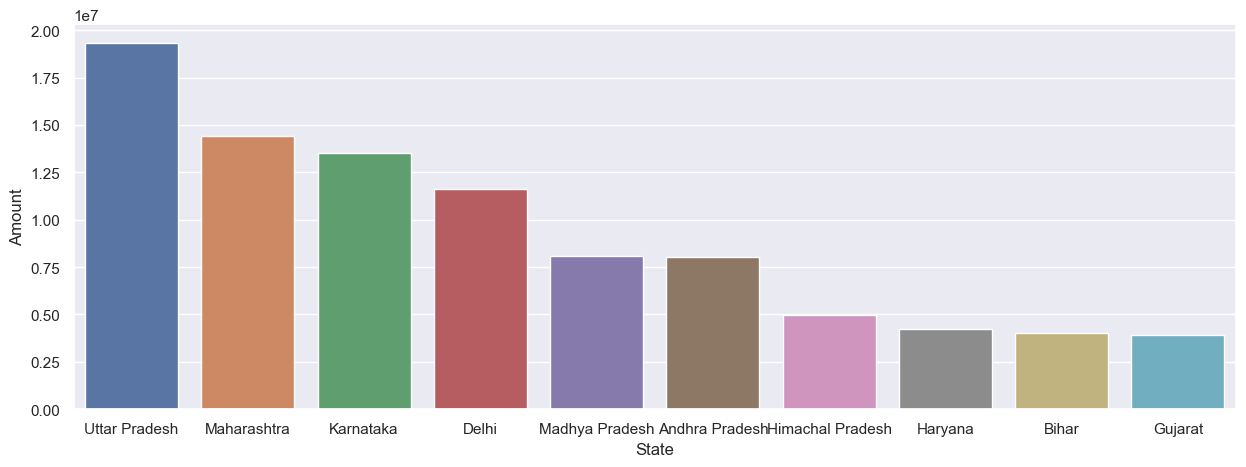

In [77]:
#LET US VISUALIZE THE TOTAL AMOUNT CONTRIBUTED BY TOP 10 STATES
sbn.set(rc={'figure.figsize':(15,5)})
sbn.barplot(x='State',y='Amount',data=sales_state)






In [79]:
#NUMBER OF ORDERS FROM TOP 10 STATES
sales_orders=sales.groupby(['State'],as_index=False)['Orders'].sum().sort_values('Orders' , ascending=False).head(10)


<Axes: xlabel='State', ylabel='Orders'>

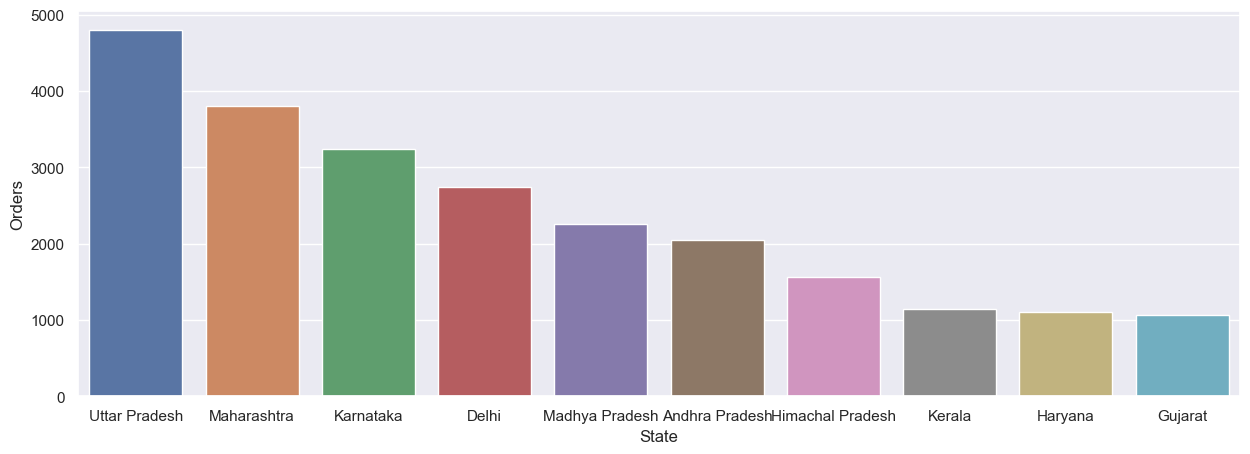

In [80]:
sbn.set(rc={'figure.figsize':(15,5)})
sbn.barplot(x='State',y='Orders',data=sales_orders)


In [81]:
#MAXIMUM NUMBER OF ORDERS AND SALES ARE FROM UTTAR PRADESH, MAHARASHTRA, KARNATAKA AND DELHI

In [90]:
sales_status=sales.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

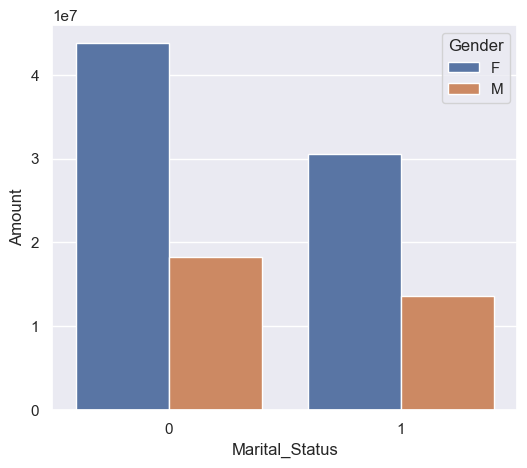

In [93]:
sbn.set(rc={'figure.figsize':(6,5)})
sbn.barplot(data=sales_status,x='Marital_Status',y='Amount',hue='Gender')


In [94]:
#From above graph ,we can see that most of the buyers are married (women) and they have high purchasing power

<Axes: xlabel='Occupation', ylabel='count'>

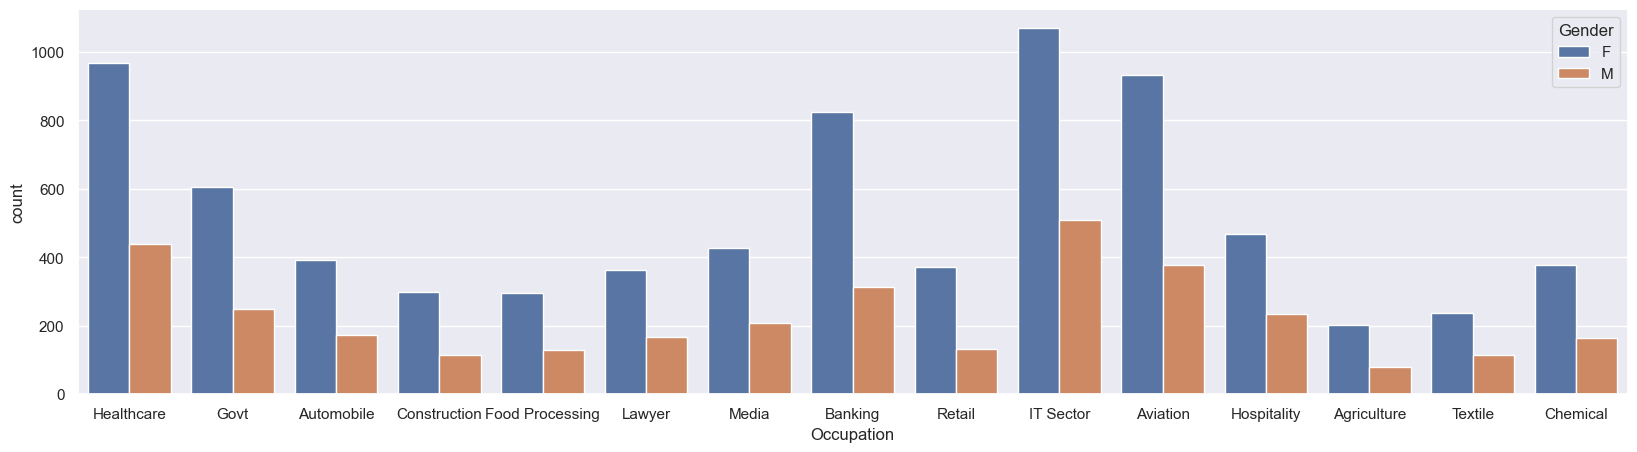

In [97]:
sbn.set(rc={'figure.figsize':(20,5)})
sbn.countplot(data=sales,x='Occupation',hue='Gender')



In [98]:
#MOST OF THE BUYERS ARE WOMEN FROM HEALTHCARE,IT SECTOR AND AVIATION OCCUPATIONS


<Axes: xlabel='Item_category', ylabel='count'>

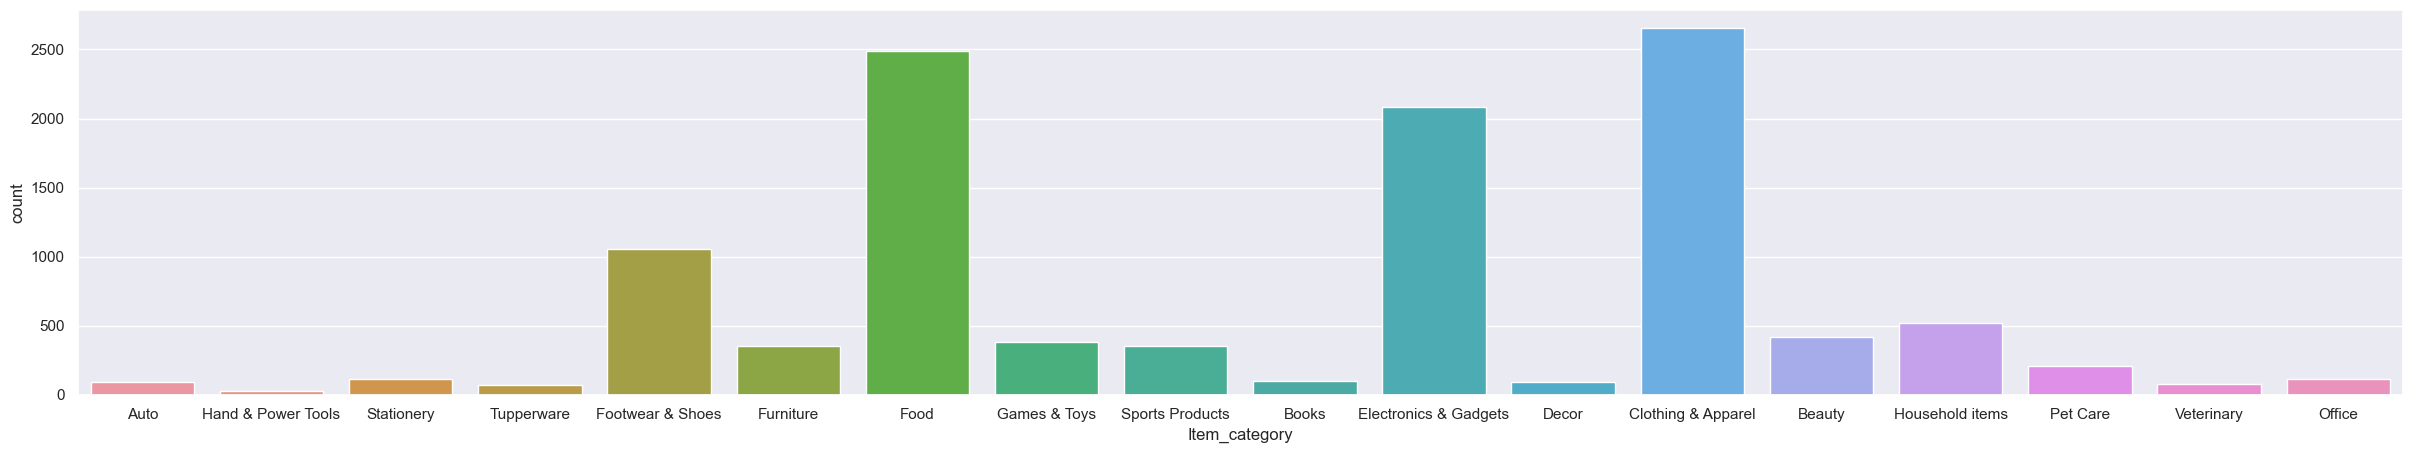

In [109]:
sbn.set(rc={'figure.figsize':(30,5)})
sbn.countplot(data=sales,x='Item_category')


<Axes: xlabel='Item_category', ylabel='Amount'>

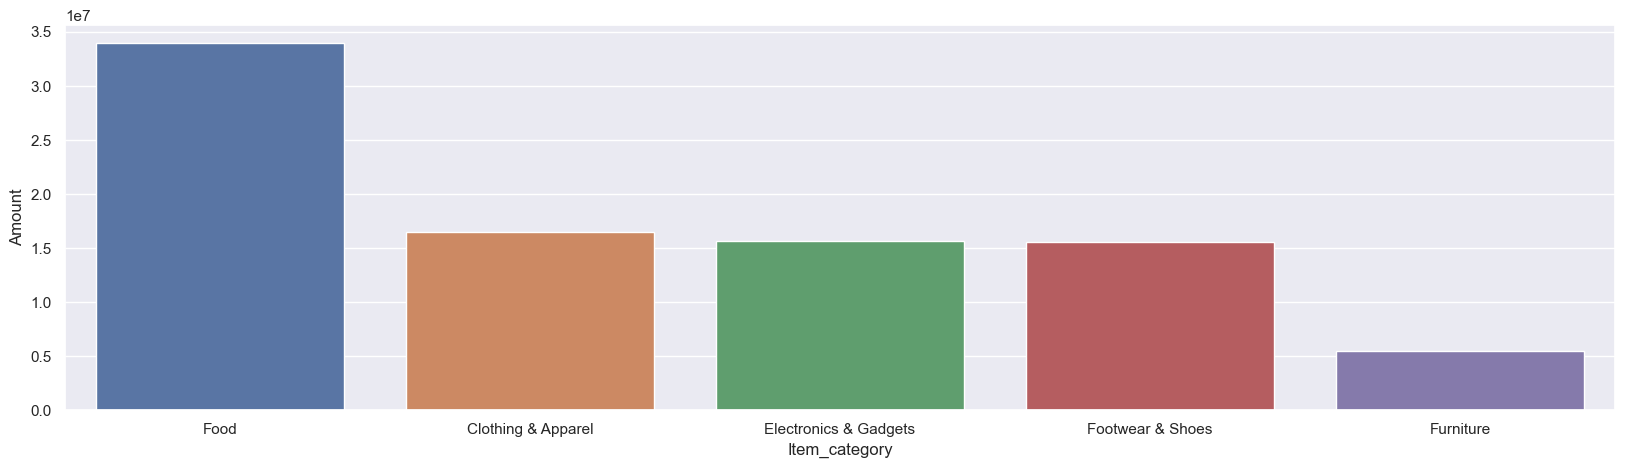

In [117]:
sales_items=sales.groupby(['Item_category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sbn.set(rc={'figure.figsize':(20,5)})
sbn.barplot(data=sales_items,x='Item_category',y='Amount')


In [118]:
#MAXIMUM AMOUNT OF MONEY HAS BEEN SPENT ON FOOD, CLOTHING AND APPAREL AND ELECTRONICS AND GADGETS


In [ ]:
#CONCLUSION
#Married women age group 26-35 yrs from UP, Maharastra and Karnataka
#working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category